#VIDEO GAME suggestion

In [1]:
!pip install -U scikit-learn
import nltk
import spacy
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split , cross_validate , StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score , classification_report

In [2]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
train = pd.read_csv('train.csv')
validation = pd.read_csv('validation.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape , validation.shape , test.shape

((17877, 5), (3831, 5), (3831, 5))

In [5]:
train.head()

,review_id,title,year,user_review,user_suggestion
0,460,Black Squad,2018.0,"Early Access ReviewVery great shooter, that ha...",1
1,2166,Tree of Savior (English Ver.),2016.0,I love love love playing this game!Super 100%!...,1
2,17242,Eternal Card Game,2016.0,Early Access ReviewAs a fan of MTG and Hearths...,1
3,6959,Tactical Monsters Rumble Arena,2018.0,Turn based strategy game similiar to FF Tactic...,1
4,8807,Yu-Gi-Oh! Duel Links,2017.0,This game has an insanely huge download for be...,0


In [6]:
test.head()

,review_id,title,year,user_review,user_suggestion
0,12053,Infestation: The New Z,2016.0,Unbelievable that this rehash copy and paste t...,0
1,12536,SMITE®,2015.0,I can't recommened this game in its current st...,0
2,747,Heroes & Generals,2016.0,Early Access ReviewThis game is constantly evo...,0
3,3214,World of Warships,2018.0,I play this game because it scratches an itch....,0
4,4036,World of Guns: Gun Disassembly,2016.0,"Finally, a game for people like us to enjoy! P...",1


In [7]:
validation.head()

,review_id,title,year,user_review,user_suggestion
0,8604,Dungeon Defenders II,2015.0,Early Access Review* Ok Played the first DD lo...,1
1,20407,Minion Masters,2017.0,Product received for freeEarly Access ReviewSo...,1
2,636,Magic Duels,2018.0,Game is extremely unfun to play unless you wan...,0
3,10217,Robocraft,2016.0,Early Access ReviewThis used to be an amazing ...,0
4,9564,Realm of the Mad God,2014.0,"With stunning visuals, an immersive storyline,...",1


In [8]:
test['user_suggestion'].value_counts() #target vaiable user_suggestion

,count
user_suggestion,
1,2187
0,1644


In [9]:
#load spacy english model
# since we are not using NER we can disable it to speedup
nlp = spacy.load('en_core_web_sm', disable='ner')

In [10]:
def preprocess_text(texts):
    # lemmatize the tokens and store them in a list
    processed_texts = []
    for doc in nlp.pipe(texts, n_process=-1):
        lemmatized_tokens = [token.lemma_.lower() for token in doc if token.is_alpha and token.lemma_ not in nlp.Defaults.stop_words]

        # Join the lemmatized tokens into a string
        processed_text = " ".join(lemmatized_tokens)

        processed_texts.append(processed_text)

    return processed_texts


In [11]:
train['user_review'] = preprocess_text(train['user_review'])
validation['user_review'] = preprocess_text(validation['user_review'])
test['user_review'] = preprocess_text(test['user_review'])

In [12]:
train['user_review'].head()


,user_review
0,early access reviewvery great shooter original...
1,i love love love play lot class choose bound s...
2,early access reviewas fan mtg hearthstone fun ...
3,turn base strategy game similiar ff tactic day...
4,game insanely huge download phone game blast v...


In [13]:
count_vectorizer_ohe = CountVectorizer(min_df=0.001, binary =True) # Changed min_dif to min_df


In [14]:
count_vectorizer_ohe_train = count_vectorizer_ohe.fit_transform(train['user_review'])

BUILDING Naive Bayes Model

In [15]:
naive_bayes_classifier = BernoulliNB()

In [16]:
naive_bayes_classifier.fit(count_vectorizer_ohe_train, train['user_suggestion'])
naive_bayes_classifier.score(count_vectorizer_ohe_train, train['user_suggestion'])

0.8258096996140292

In [17]:
count_vectorizer_ohe_val = count_vectorizer_ohe.transform(validation['user_review'])
naive_bayes_classifier.score(count_vectorizer_ohe_val, validation['user_suggestion'])

0.8120595144870791

In [18]:
count_vectorizer = CountVectorizer(min_df=0.001)

In [19]:
count_vectorizer_train = count_vectorizer.fit_transform(train['user_review'])

In [20]:
naive_bayes_classifier = MultinomialNB()

In [21]:
naive_bayes_classifier.fit(count_vectorizer_ohe_train, train['user_suggestion'])
naive_bayes_classifier.score(count_vectorizer_ohe_train, train['user_suggestion'])

0.8452760530290317

In [22]:
count_vectorizer_ohe_val = count_vectorizer_ohe.transform(validation['user_review'])
naive_bayes_classifier.score(count_vectorizer_ohe_val, validation['user_suggestion'])

0.8261550509005482

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
tfidf_vectorizer = TfidfVectorizer(min_df=0.001)


In [25]:
tfidf_vectorizer_train = tfidf_vectorizer.fit_transform(train['user_review'])
# Initialize the classifier, for example, using MultinomialNB
tfidf_vectorizer_classifier = MultinomialNB() # Added this line to initialize the classifier
tfidf_vectorizer_classifier.fit(tfidf_vectorizer_train, train['user_suggestion'])
tfidf_vectorizer_classifier.score(tfidf_vectorizer_train, train['user_suggestion'])

0.8414722828215024

In [26]:
tfidf_vectorizer_val = tfidf_vectorizer.transform(validation['user_review'])
tfidf_vectorizer_classifier.score(tfidf_vectorizer_val, validation['user_suggestion'])

0.8209344818585226

#USING N-GRAM WITH TF-IDF

In [27]:
tfidf_ngram_vectorizer = TfidfVectorizer(min_df= 0.001, ngram_range=(1,3))

In [28]:
tfidf_ngram_vectorizer_train = tfidf_ngram_vectorizer.fit_transform(train['user_review'])
# Initialize tfidf_ngram_classifier with a classifier like MultinomialNB
 # This line initializes the classifier
naive_bayes_classifier.fit(tfidf_ngram_vectorizer_train, train['user_suggestion'])
naive_bayes_classifier.score(tfidf_ngram_vectorizer_train, train['user_suggestion'])

0.859204564524249

In [29]:
tfidf_ngram_vectorizer.get_feature_names_out()[150:160]

array(['actually good', 'actually like', 'actually look', 'actually play',
       'actually play game', 'actually pretty', 'actually use',
       'actually want', 'actually work', 'actualy'], dtype=object)

In [30]:
tfidf_ngram_vectorizer_val = tfidf_ngram_vectorizer.transform(validation['user_review'])
naive_bayes_classifier.score(tfidf_ngram_vectorizer_val, validation['user_suggestion'])

0.828765335421561

In [31]:
count_ngram_vectorizer = CountVectorizer(min_df=0.001, ngram_range=(1,3))

In [32]:
nlp = spacy.load("en_core_web_sm")


In [33]:
def preprocess_text_spacy(processed_texts):
    # Tokenization and POS tagging
    pos_texts = []
    for doc in nlp.pipe(processed_texts):
        pos_tags = [token.pos_ for token in doc]
        pos_text = " ".join(pos_tags)
        pos_texts.append(pos_text)

    # Named Entity Recognition (NER)
    ner_texts = []
    for doc in nlp.pipe(processed_texts):
        ner_tags = [token.ent_type_ if token.ent_type_ else "O" for token in doc]
        ner_text = " ".join(ner_tags)
        ner_texts.append(ner_text)

    return [pos_texts, ner_texts]

In [34]:
#applying preprocess_text_spacy function to user_review column for train data
pos_texts, ner_texts = preprocess_text_spacy(train['user_review'])

In [35]:
train['pos_tags'] = pos_texts
train['ner_tags'] = ner_texts

In [36]:
train.head()

,review_id,title,year,user_review,user_suggestion,pos_tags,ner_tags
0,460,Black Squad,2018.0,early access reviewvery great shooter original...,1,ADJ NOUN NOUN ADJ ADJ NOUN NOUN PROPN VERB NOU...,O O O O O O O O O O O O O O O O O O O O O O O ...
1,2166,Tree of Savior (English Ver.),2016.0,i love love love play lot class choose bound s...,1,PRON VERB NOUN NOUN NOUN NOUN NOUN VERB VERB A...,O O O O O O O O O O O O O O
2,17242,Eternal Card Game,2016.0,early access reviewas fan mtg hearthstone fun ...,1,ADJ NOUN VERB PROPN PROPN NOUN NOUN NOUN ADJ N...,O O O O O O O O O O O O O O O O O O O O
3,6959,Tactical Monsters Rumble Arena,2018.0,turn base strategy game similiar ff tactic day...,1,VERB NOUN NOUN NOUN ADJ ADJ NOUN NOUN VERB ADV...,O O O O O O DATE DATE O O O O O O O O O O O O ...
4,8807,Yu-Gi-Oh! Duel Links,2017.0,game insanely huge download phone game blast v...,0,NOUN ADV ADJ NOUN NOUN NOUN NOUN NOUN ADJ NOUN...,O O O O O O O O O O O O O O O


In [37]:
from spacy import displacy

text = train['user_review'][3]
text
doc = nlp(text)
displacy.render(doc, style="ent")

In [38]:
text1= "India is a country with leading IT companies such as Infosys, TCS, Wipro etc. Most of them make millions of dollars in revenues and are based out of Hyderabad"
text1
doc = nlp(text1)
displacy.render(doc, style="ent")

In [39]:
del train['pos_tags']
del train['ner_tags']

In [40]:
def remove_noun(df):

  nlp = spacy.load("en_core_web_sm")

  # Process user_review column
  filtered_reviews = []
  for review in df['user_review']:
    filtered_review = " ".join([token.text for token in nlp(review) if token.pos_ not in ['NOUN', 'PROPN']])
    filtered_reviews.append(filtered_review)

  return filtered_reviews

In [41]:
w_noun_train  = remove_noun(train)

In [42]:
train['user_review'].head()

,user_review
0,early access reviewvery great shooter original...
1,i love love love play lot class choose bound s...
2,early access reviewas fan mtg hearthstone fun ...
3,turn base strategy game similiar ff tactic day...
4,game insanely huge download phone game blast v...


In [43]:
w_noun_train[:5]

['early great shooter understand visual look i think evolve sure early i think need cuz compare low think go i hope understand i like i think i',
 'i love choose bound storyline',
 'early reviewas far good know haha great',
 'turn similiar ff remember easy enjoyable different try bored want able play occasional',
 'insanely huge entire far long']

In [44]:
tfidf_wnoun_vectorizer = TfidfVectorizer(min_df=0.001)
tfidf_wnoun_vectorizer_train = tfidf_wnoun_vectorizer .fit_transform(w_noun_train)

In [45]:
# tfidf_wnoun_vectorizer_train =tfidf_wnoun_vectorizer .fit_transform(train['user_review'])
naive_bayes_classifier.fit(tfidf_wnoun_vectorizer_train , train['user_suggestion'])
naive_bayes_classifier.score(tfidf_wnoun_vectorizer_train, train['user_suggestion'])

0.8005817530905633

In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader , TensorDataset

In [48]:
tfidf_ann_vectorizer = TfidfVectorizer(min_df=0.001)

In [49]:
#fitting the ann_vectorizer to train and validation data
features_train = tfidf = tfidf_ann_vectorizer.fit_transform(train['user_review'])
features_validation = tfidf_ann_vectorizer.transform(validation['user_review'])

In [50]:
#converting the features_train and features_validation to tensors
features_train = torch.tensor(features_train.toarray(), dtype=torch.float32)
features_validation = torch.tensor(features_validation.toarray(), dtype=torch.float32)

In [51]:
y_train = torch.tensor(train['user_suggestion'])
y_validation = torch.tensor(validation['user_suggestion'])

In [53]:
train_dataset = TensorDataset(features_train, y_train)
val_dataset = TensorDataset(features_validation, y_validation)

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=256, shuffle=True)

In [54]:
class ANNModel(nn.Module):
  def __init__(self, input_size, output_size, dropout_rate, hidden_size):
    super(ANNModel, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(dropout_rate)
    self.fc2 = nn.Linear(hidden_size, output_size)
    self.fc3 = nn.Sigmoid()


  def forward(self, X):
    out = self.fc1(X)
    out = self.relu(out)
    out = self.dropout(out)
    out = self.fc2(out)
    out = self.fc3(out)
    return out


In [58]:
model = ANNModel(input_size = features_train.shape[1], hidden_size=64, output_size=1, dropout_rate=0.5)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

Epoch 1/30, Loss: 0.6503, Val Loss: 0.5832
Epoch 2/30, Loss: 0.5043, Val Loss: 0.4456
Epoch 3/30, Loss: 0.3990, Val Loss: 0.3894
Epoch 4/30, Loss: 0.3536, Val Loss: 0.3729
Epoch 5/30, Loss: 0.3264, Val Loss: 0.3595
Epoch 6/30, Loss: 0.3102, Val Loss: 0.3593
Epoch 7/30, Loss: 0.2988, Val Loss: 0.3564
Epoch 8/30, Loss: 0.2862, Val Loss: 0.3627
Epoch 9/30, Loss: 0.2785, Val Loss: 0.3616
Epoch 10/30, Loss: 0.2707, Val Loss: 0.3668
Epoch 11/30, Loss: 0.2647, Val Loss: 0.3688
Epoch 12/30, Loss: 0.2568, Val Loss: 0.3746
Epoch 13/30, Loss: 0.2497, Val Loss: 0.3823
Epoch 14/30, Loss: 0.2457, Val Loss: 0.3865
Epoch 15/30, Loss: 0.2393, Val Loss: 0.3874
Epoch 16/30, Loss: 0.2352, Val Loss: 0.3957
Epoch 17/30, Loss: 0.2292, Val Loss: 0.4019
Epoch 18/30, Loss: 0.2235, Val Loss: 0.4025
Epoch 19/30, Loss: 0.2195, Val Loss: 0.4148
Epoch 20/30, Loss: 0.2128, Val Loss: 0.4197
Epoch 21/30, Loss: 0.2094, Val Loss: 0.4250
Epoch 22/30, Loss: 0.2024, Val Loss: 0.4358
Epoch 23/30, Loss: 0.1982, Val Loss: 0.43

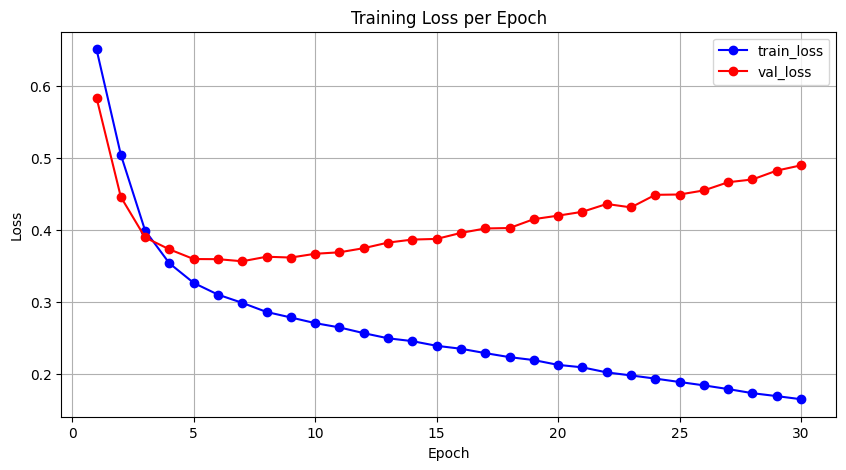

In [59]:
import matplotlib.pyplot as plt

num_epochs = 30  # Number of epochs
losses = []  # List to store the average loss per epoch
val_losses = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    total_loss = 0  # Variable to store the total loss in each epoch
    total_val_loss = 0
    count = 0  # Variable to count the number of batches
    val_count = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        outputs = outputs.squeeze()  # Squeeze the output to match the label's shape
        loss = criterion(outputs, labels.float())  # Ensure labels are float
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        count += 1
    average_loss = total_loss / count  # Calculate average loss for the epoch
    losses.append(average_loss)  # Append average loss to the list

    for inputs, labels in val_loader:
        val_outputs = model(inputs)
        val_outputs = val_outputs.squeeze()  # Squeeze the output to match the label's shape
        val_loss = criterion(val_outputs, labels.float())  # Ensure labels are float
        total_val_loss += val_loss.item()
        val_count += 1
    average_val_loss = total_val_loss / val_count  # Calculate average loss for the epoch
    val_losses.append(average_val_loss)  # Append average loss to the list
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {average_loss:.4f}, Val Loss: {average_val_loss:.4f}')

# Plotting the training loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), losses, marker='o', linestyle='-', color='b', label = 'train_loss')
plt.plot(range(1, num_epochs + 1), val_losses, marker='o', linestyle='-', color='r', label = 'val_loss')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
def calculate_accuracy(loader):
  model.eval()
  correct, total = 0,0
  with torch.no_grad():
    for inputs, labels in loader:
      outputs = model(inputs)
      predicted = outputs.squeeze() > 0.5
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  return 100* correct/total

train_accuracy = calculate_accuracy(train_loader)
val_accuracy = calculate_accuracy(val_loader)

print(f'Train Accuracy: {train_accuracy:.2f}%')
print(f'Validation Accuracy: {val_accuracy:.2f}%')

Train Accuracy: 95.14%
Validation Accuracy: 82.56%
